<a href="https://colab.research.google.com/github/vmjs1234/CLUSTERING_ASSIGNMENT/blob/main/i)_audio_clustering_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


# Install necessary libraries
!pip install librosa numpy scikit-learn

import librosa
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def extract_features(audio_file):
    """Extracts MFCC features from an audio file."""
    try:
        y, sr = librosa.load(audio_file)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # Extract 20 MFCCs
        mfccs_scaled = np.mean(mfccs.T,axis=0)
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None  # Return None for files that cause errors
    return mfccs_scaled

def cluster_audio(audio_files, n_clusters=3):
  """Clusters audio files based on MFCC features."""

  features = []
  valid_files = [] #Keep track of files that were successfully processed
  for file in audio_files:
    extracted_features = extract_features(file)
    if extracted_features is not None:
      features.append(extracted_features)
      valid_files.append(file)

  if not features:
    print("No valid audio files processed. Check file paths and formats.")
    return {}

  # Scale features
  scaler = StandardScaler()
  features_scaled = scaler.fit_transform(features)

  # Perform KMeans clustering
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  kmeans.fit(features_scaled)

  # Create a dictionary to store the clustering results
  clustering_results = {}
  for i, file in enumerate(valid_files):
    cluster_label = kmeans.labels_[i]
    clustering_results[file] = cluster_label

  return clustering_results

# Example usage
audio_files = ['/content/CantinaBand60.wav', '/content/Fanfare60.wav', '/content/ImperialMarch60.wav'] # Replace with your audio file paths





results = cluster_audio(audio_files, n_clusters=2)

results

{'/content/CantinaBand60.wav': 1,
 '/content/Fanfare60.wav': 0,
 '/content/ImperialMarch60.wav': 1}

In [3]:
results

{'/content/CantinaBand60.wav': 1,
 '/content/Fanfare60.wav': 0,
 '/content/ImperialMarch60.wav': 1}

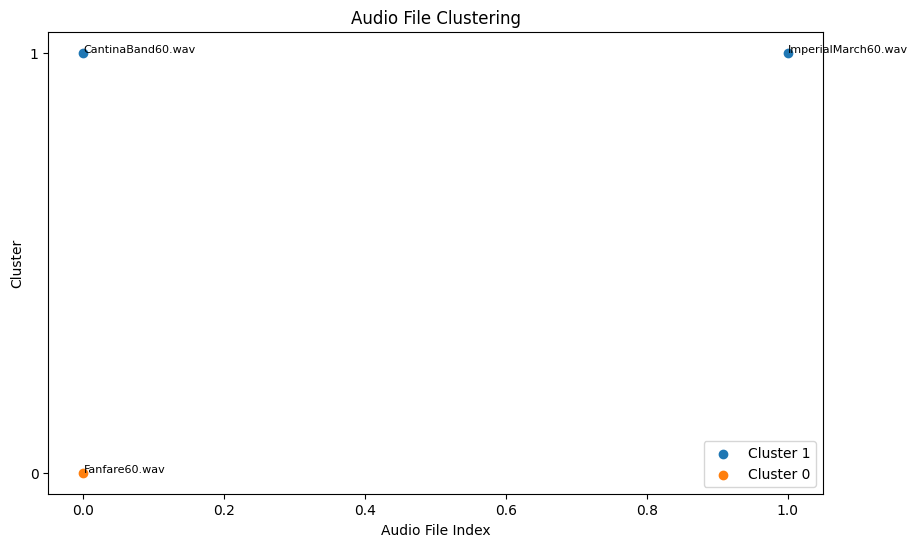

In [4]:


import matplotlib.pyplot as plt
import pandas as pd

def visualize_clusters(results):
    """Visualizes the clustering results."""
    if not results:
        print("No clustering results to visualize.")
        return

    df = pd.DataFrame(list(results.items()), columns=['Audio File', 'Cluster'])

    plt.figure(figsize=(10, 6))
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(range(len(cluster_data)), [cluster] * len(cluster_data), label=f'Cluster {cluster}')
        for i, txt in enumerate(cluster_data['Audio File']):
              plt.annotate(txt.split('/')[-1], (i,cluster), fontsize=8)

    plt.xlabel("Audio File Index")
    plt.ylabel("Cluster")
    plt.title("Audio File Clustering")
    plt.yticks(df['Cluster'].unique())
    plt.legend()
    plt.show()


# Example usage (assuming 'results' from the previous code)

visualize_clusters(results)